## Imports

In [17]:
import os
import sys
import sklearn
import random
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow import keras
from sklearn.metrics import accuracy_score

## Data

In [18]:
# Load in data
in_file_path = 'C:\\Users\\Benji\\Desktop\\Work\\Music\\Data\\Isolated\\Processed\\Input\\input.txt'
out_file_path = 'C:\\Users\\Benji\\Desktop\\Work\\Music\\Data\\Isolated\\Processed\\Output\\output.txt'

inp = pd.read_csv(in_file_path,sep="	",header=None)
out = pd.read_csv(out_file_path,sep="	",header=None)


In [19]:
a=out.copy()
b=out.copy()
a=a.iloc[:,0:88]
b=b.iloc[:,100]
out=pd.concat([a,b],axis=1,ignore_index=True)
out

,0,1,2,3,4,5,6,7,8,9,...,79,80,81,82,83,84,85,86,87,88
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [20]:
display(inp.iloc[0:10,:])

,0,1,2,3,4,5,6,7,8,9,...,386,387,388,389,390,391,392,393,394,395
0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0,2.251939,4.503877,4.503877,5.267735,5.267735,5.267735,5.267735,5.267735,5.267735,...,3.732886,3.379731,3.444591,2.619926,2.617579,2.536714,1.753817,1.576958,1.459010,1.266897
2,0,3.096148,6.192296,6.192296,6.878340,6.878340,6.878340,6.878340,6.878340,6.878340,...,1.640871,1.772594,1.821867,1.578366,1.714497,1.358405,1.881643,1.843069,1.829970,1.540454
3,0,2.584332,5.168665,5.168665,7.360459,7.360459,7.360459,7.360459,7.360459,7.360459,...,0.594425,-0.334698,-0.430611,0.502820,0.068937,0.143158,0.118356,0.072981,-0.281706,0.075947
4,0,3.000714,6.001429,6.001429,6.701647,6.701647,6.701647,6.701647,6.701647,6.701647,...,-0.623231,0.371712,0.470023,0.162091,0.221460,0.250500,0.530187,0.159522,0.305749,0.009385
5,0,2.751009,5.502019,5.502019,6.621682,6.621682,6.621682,6.621682,6.621682,6.621682,...,0.633103,0.263561,-0.168876,0.346169,-0.440816,0.384683,-0.051109,0.221751,0.035686,0.602832
6,0,2.642939,5.285878,5.285878,6.867776,6.867776,6.867776,6.867776,6.867776,6.867776,...,-0.890348,-0.869460,-0.617617,-0.647156,-0.466353,-0.895708,-0.513983,-1.051126,-0.645904,-1.380035
7,0,2.371071,4.742141,4.742141,7.653968,7.653968,7.653968,7.653968,7.653968,7.653968,...,0.084704,0.522521,0.457197,0.300003,0.246175,0.269324,0.340245,0.608106,0.927223,1.058712
8,0,2.403097,4.806194,4.806194,4.775225,4.775225,4.775225,4.775225,4.775225,4.775225,...,0.332082,0.043317,-0.011749,-0.175405,1.035872,0.576066,0.032425,0.454823,0.370297,0.560443
9,0,2.462601,4.925202,4.925202,5.128348,5.128348,5.128348,5.128348,5.128348,5.128348,...,0.251075,0.582727,0.905515,0.560194,0.005657,0.148847,0.304870,0.414894,-0.168880,-0.491118


In [21]:
display(out.iloc[0:10,:])

,0,1,2,3,4,5,6,7,8,9,...,79,80,81,82,83,84,85,86,87,88
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Get some info

In [22]:
count_empty = np.sum(out.iloc[:,out.shape[1]-1],axis=0)
count_not_empty = out.shape[0] - count_empty
print('Empty instances:',count_empty)
print('Not empty instances:',count_not_empty)


Empty instances: 10402
Not empty instances: 8785


In [23]:
only_notes=out.iloc[:,0:out.shape[1]-1]
count_notes = np.sum(only_notes,axis=1)
single_note_idx = np.where(count_notes==1)[0]
count_notes_hot = pd.get_dummies(count_notes)
out_hot=pd.concat([only_notes,count_notes_hot],axis=1,ignore_index=True).iloc[:,0:90]
display(out_hot.iloc[0:10,:])

,0,1,2,3,4,5,6,7,8,9,...,80,81,82,83,84,85,86,87,88,89
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [25]:
empty = out_hot.iloc[:,out.shape[1]-1].get_values()
empty_idx = np.where(empty==1)[0]
not_empty_idx = np.where(empty==0)[0]

# How many empty?
num_empty = 5000

# Get random empty index
ii = random.sample(range(0,empty_idx.shape[0]),num_empty)
rand_empty_idx = empty_idx[ii]

# Get single notes
i1 = np.intersect1d(not_empty_idx,single_note_idx)
print('a')

a


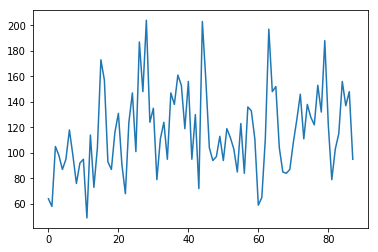

In [24]:
plt.plot(np.sum(out.iloc[:,0:out.shape[1]-1],axis=0))

In [27]:
# Split no note info
X_n = pd.concat([inp.iloc[i1,:],inp.iloc[rand_empty_idx,:]],axis=0,ignore_index=True)
y_n = pd.concat([out.iloc[i1,0:out.shape[1]-1],out.iloc[rand_empty_idx,0:out.shape[1]-1]],axis=0,ignore_index=True)
X_train_n,X_test_n,y_train_n,y_test_n = train_test_split(X_n,y_n,train_size=0.80,test_size=0.20)
print('X_train_n shape:',X_train_n.shape)
print('y_train_n shape:',y_train_n.shape)
print('X_test_n shape:',X_test_n.shape)
print('y_test_n shape:',y_test_n.shape)

X_train_n shape: (9848, 396)
y_train_n shape: (9848, 88)
X_test_n shape: (2463, 396)
y_test_n shape: (2463, 88)


In [26]:
# Split with empty
X_e = pd.concat([inp.iloc[i1,:],inp.iloc[rand_empty_idx,:]],axis=0,ignore_index=True)
y_e = pd.concat([out.iloc[i1,:],out.iloc[rand_empty_idx,:]],axis=0,ignore_index=True)
X_train_e,X_test_e,y_train_e,y_test_e = train_test_split(X_e,y_e,train_size=0.80,test_size=0.20)
print('X_train_e shape:',X_train_e.shape)
print('y_train_e shape:',y_train_e.shape)
print('X_test_e shape:',X_test_e.shape)
print('y_test_e shape:',y_test_e.shape)

X_train_e shape: (9848, 396)
y_train_e shape: (9848, 89)
X_test_e shape: (2463, 396)
y_test_e shape: (2463, 89)


In [28]:
# Split note one_hot
X_h = pd.concat([inp.iloc[i1,:],inp.iloc[rand_empty_idx,:]],axis=0,ignore_index=True)
y_h = pd.concat([out_hot.iloc[i1,:],out_hot.iloc[rand_empty_idx,:]],axis=0,ignore_index=True)
X_train_h,X_test_h,y_train_h,y_test_h = train_test_split(X_h,y_h,train_size=0.80,test_size=0.20)
print('X_train_h shape:',X_train_h.shape)
print('y_train_h shape:',y_train_h.shape)
print('X_test_h shape:',X_test_h.shape)
print('y_test_h shape:',y_test_h.shape)
print('y_h shape:',y_h.shape)

X_train_h shape: (9848, 396)
y_train_h shape: (9848, 90)
X_test_h shape: (2463, 396)
y_test_h shape: (2463, 90)
y_h shape: (12311, 90)


## Training

In [29]:
# Single layer, no note info
model_s_n = keras.Sequential()
model_s_n.add(keras.layers.Dense(units=out.shape[1]-1, activation='relu',input_dim=X_n.shape[1]))
model_s_n.add(keras.layers.Dense(units=out.shape[1]-1, activation='softmax'))
model_s_n.compile(loss='categorical_crossentropy', optimizer='sgd',metrics=['accuracy'])
model_s_n.fit(X_train_n,y_train_n,epochs=25, batch_size=32)
print('Done')

Epoch 1/25
9848/9848 [==============================] - 1s 84us/step - loss: 2.6228 - acc: 0.0208
Epoch 2/25
9848/9848 [==============================] - 1s 60us/step - loss: 2.4046 - acc: 0.0618
Epoch 3/25
9848/9848 [==============================] - 1s 67us/step - loss: 2.1526 - acc: 0.1096
Epoch 4/25
9848/9848 [==============================] - 1s 68us/step - loss: 1.8830 - acc: 0.1684
Epoch 5/25
9848/9848 [==============================] - 1s 72us/step - loss: 1.6312 - acc: 0.2225
Epoch 6/25
9848/9848 [==============================] - 1s 68us/step - loss: 1.4258 - acc: 0.2671
Epoch 7/25
9848/9848 [==============================] - 1s 70us/step - loss: 1.2626 - acc: 0.3036
Epoch 8/25
9848/9848 [==============================] - 1s 65us/step - loss: 1.1295 - acc: 0.3324
Epoch 9/25
9848/9848 [==============================] - 1s 60us/step - loss: 1.0230 - acc: 0.3552
Epoch 10/25
9848/9848 [==============================] - 1s 61us/step - loss: 0.9355 - acc: 0.3729
Epoch 11/25
9848/98

In [32]:
# Single layer, with empty
model_s_e = keras.Sequential()
model_s_e.add(keras.layers.Dense(units=out.shape[1], activation='relu',input_dim=X_e.shape[1]))
model_s_e.add(keras.layers.Dense(units=out.shape[1], activation='softmax'))
model_s_e.compile(loss='categorical_crossentropy', optimizer='sgd',metrics=['accuracy'])
model_s_e.fit(X_train_e,y_train_e,epochs=25, batch_size=32)
print('Done')

Epoch 1/25
9848/9848 [==============================] - 1s 90us/step - loss: 3.8247 - acc: 0.3883
Epoch 2/25
9848/9848 [==============================] - 1s 78us/step - loss: 3.0908 - acc: 0.4179
Epoch 3/25
9848/9848 [==============================] - 1s 72us/step - loss: 2.5943 - acc: 0.4565
Epoch 4/25
9848/9848 [==============================] - 1s 76us/step - loss: 2.2869 - acc: 0.5007
Epoch 5/25
9848/9848 [==============================] - 1s 67us/step - loss: 2.0191 - acc: 0.5490
Epoch 6/25
9848/9848 [==============================] - 1s 75us/step - loss: 1.8123 - acc: 0.5812
Epoch 7/25
9848/9848 [==============================] - 1s 68us/step - loss: 1.6398 - acc: 0.6189
Epoch 8/25
9848/9848 [==============================] - 1s 66us/step - loss: 1.4938 - acc: 0.6460
Epoch 9/25
9848/9848 [==============================] - 1s 69us/step - loss: 1.3712 - acc: 0.6676
Epoch 10/25
9848/9848 [==============================] - 1s 62us/step - loss: 1.2751 - acc: 0.6923
Epoch 11/25
9848/98

In [30]:
# Single layer, one hot encoding for notes
model_s_h = keras.Sequential()
model_s_h.add(keras.layers.Dense(units=y_h.shape[1], activation='relu',input_dim=X_h.shape[1]))
model_s_h.add(keras.layers.Dense(units=y_h.shape[1], activation='softmax'))
model_s_h.compile(loss='categorical_crossentropy', optimizer='sgd',metrics=['accuracy'])
model_s_h.fit(X_train_h,y_train_h,epochs=25, batch_size=32)

Epoch 1/25
9848/9848 [==============================] - 1s 84us/step - loss: 4.9525 - acc: 0.2970
Epoch 2/25
9848/9848 [==============================] - 1s 66us/step - loss: 4.0060 - acc: 0.3480
Epoch 3/25
9848/9848 [==============================] - 1s 62us/step - loss: 3.4727 - acc: 0.3551
Epoch 4/25
9848/9848 [==============================] - 1s 61us/step - loss: 3.1751 - acc: 0.3604
Epoch 5/25
9848/9848 [==============================] - 1s 58us/step - loss: 2.9528 - acc: 0.3718
Epoch 6/25
9848/9848 [==============================] - 1s 60us/step - loss: 2.7567 - acc: 0.3834
Epoch 7/25
9848/9848 [==============================] - 1s 66us/step - loss: 2.6050 - acc: 0.4007
Epoch 8/25
9848/9848 [==============================] - 1s 66us/step - loss: 2.4822 - acc: 0.4095
Epoch 9/25
9848/9848 [==============================] - 1s 62us/step - loss: 2.3533 - acc: 0.4234
Epoch 10/25
9848/9848 [==============================] - 1s 72us/step - loss: 2.2609 - acc: 0.4342
Epoch 11/25
9848/98

In [33]:
y_pred_n = model_s_n.predict(X_test_n,batch_size=32)
y_pred_e = model_s_e.predict(X_test_e,batch_size=32)
y_pred_h = model_s_h.predict(X_test_h,batch_size=32)

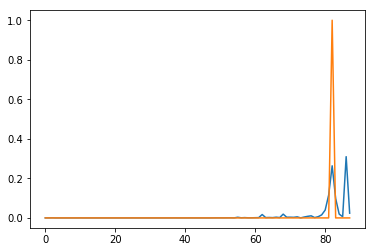

Predicted: 86
Actual: 82


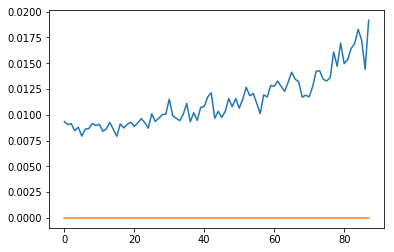

Predicted: 87
Actual: 0


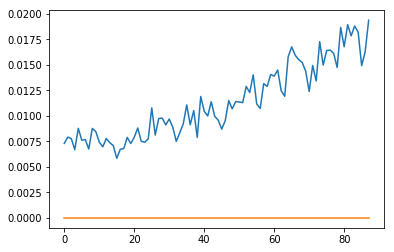

Predicted: 87
Actual: 0


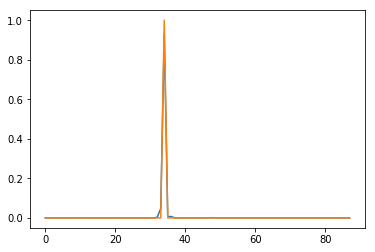

Predicted: 34
Actual: 34


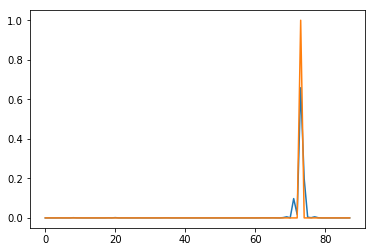

Predicted: 73
Actual: 73


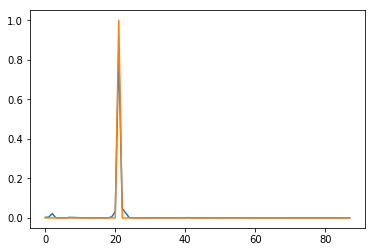

Predicted: 21
Actual: 21


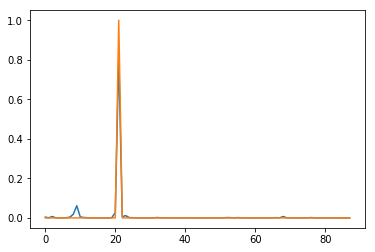

Predicted: 21
Actual: 21


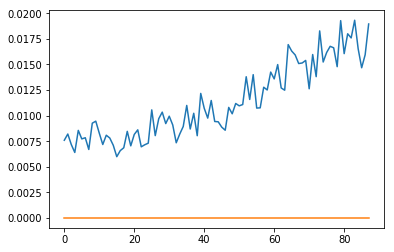

Predicted: 83
Actual: 0


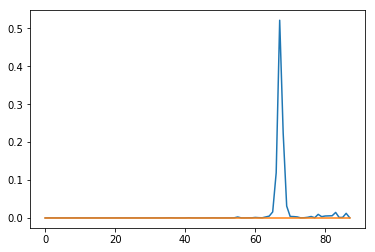

Predicted: 67
Actual: 0


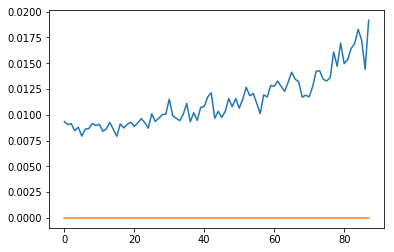

Predicted: 87
Actual: 0


In [39]:


for i in range(10):
    plt.plot(y_pred_n[i])
    plt.plot(y_test_n.iloc[i,:])
    plt.show()
    
    print('Predicted:',np.argmax(y_pred_n[i,:]))
    print('Actual:',np.argmax(y_test_n.iloc[i,:]))

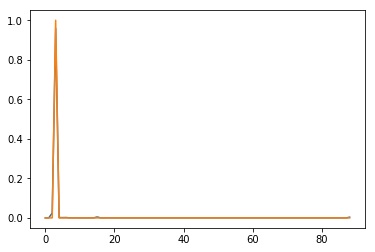

Predicted: 3
Actual: 3


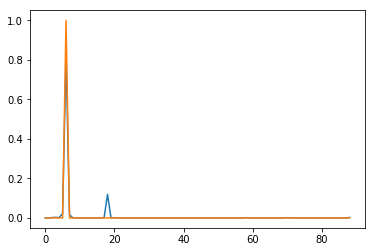

Predicted: 6
Actual: 6


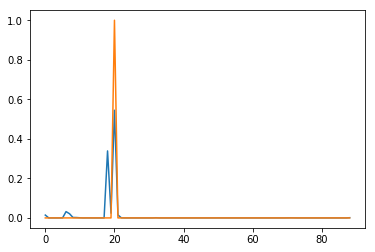

Predicted: 20
Actual: 20


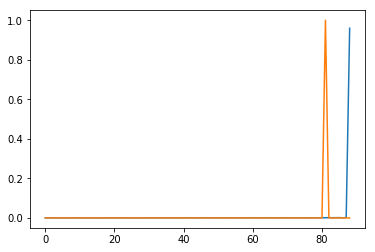

Predicted: 88
Actual: 81


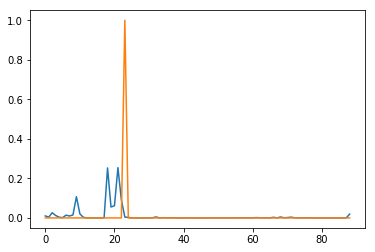

Predicted: 21
Actual: 23


In [35]:
for i in range(5):
    plt.plot(y_pred_e[i])
    plt.plot(y_test_e.iloc[i,:])
    plt.show()
    print('Predicted:',np.argmax(y_pred_e[i,:]))
    print('Actual:',np.argmax(y_test_e.iloc[i,:]))

In [ ]:
y_pred_h.shape

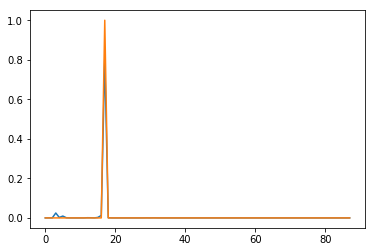

Predicted: 17
Actual: 17


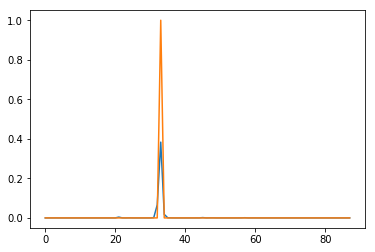

Predicted: 33
Actual: 33


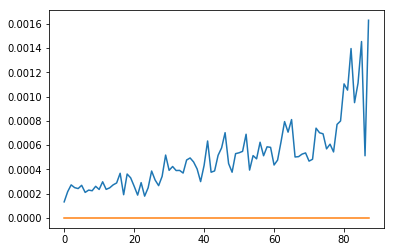

Predicted: 88
Actual: 88


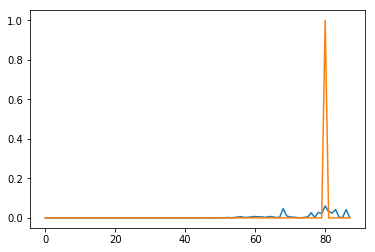

Predicted: 80
Actual: 80


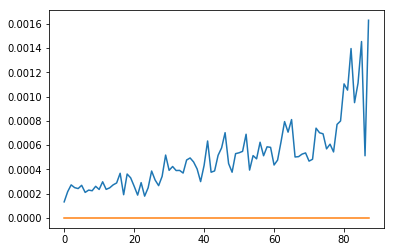

Predicted: 88
Actual: 88


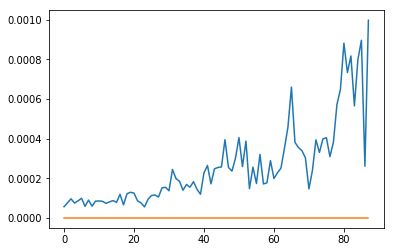

Predicted: 88
Actual: 88


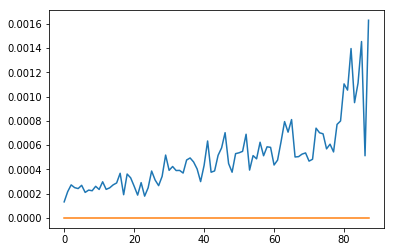

Predicted: 88
Actual: 88


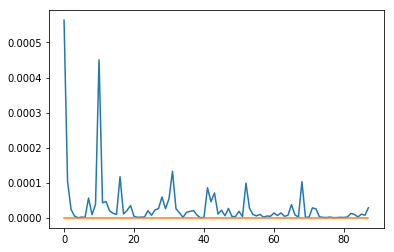

Predicted: 88
Actual: 88


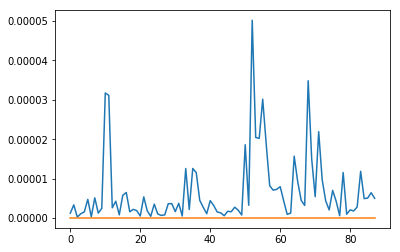

Predicted: 88
Actual: 88


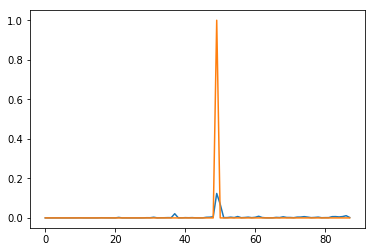

Predicted: 49
Actual: 49


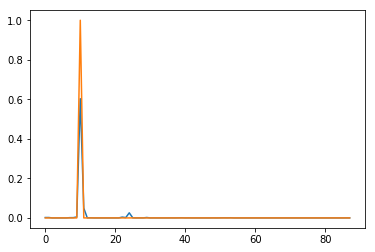

Predicted: 10
Actual: 10


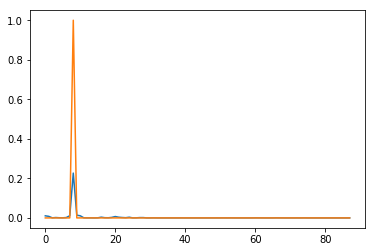

Predicted: 8
Actual: 8


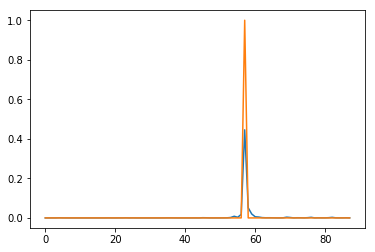

Predicted: 57
Actual: 57


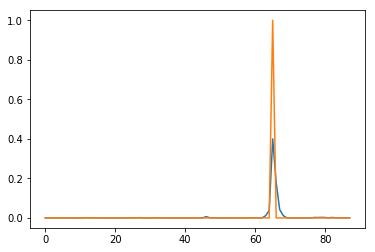

Predicted: 65
Actual: 65


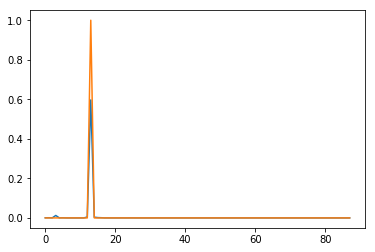

Predicted: 13
Actual: 13


In [38]:
for i in range(15):
    if (y_pred_h[i,88]<y_pred_h[i,89]):
        plt.plot(y_pred_h[i,0:88])
        plt.plot(y_test_h.iloc[i,0:88])
        plt.show()
        print('Predicted:',np.argmax(y_pred_h[i,0:88]))
        print('Actual:',np.argmax(y_test_h.iloc[i,0:88]))
    
    else:
        plt.plot(y_pred_h[i,0:88])
        plt.plot(y_test_h.iloc[i,0:88])
        plt.show()
        print('Predicted: 88',)
        print('Actual:',np.argmax(y_test_h.iloc[i,:]))